
############### NOTE BOOK WRITTEN IN BOTH FRENCH AND ENGLISH SELON MES HUMEURS :) BONNE VISUALISATION :) 


# Introduction
Seattle is a seaport city on the West Coast of the United States. It is the seat of King County, Washington. Seattle is the largest city in both the state of Washington and the Pacific Northwest region of North America.

Seattle's economy is driven by a mix of older industrial companies, and "new economy" Internet and technology companies, service, design, and clean technology companies.

The City of Seattle goal is to reduce total core greenhouse gas emissions 58% by 2030 and become carbon neutral by 2050 (https://www.seattle.gov/environment/environmental-progress/climate-change).

This project take a look at 2015 and 2016 data from non-residentials building, then aim to predict electricity consumption and greenhouse gas emissions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
import json
import urllib
import requests
plt.style.use('fivethirtyeight')

In [2]:
data1 = pd.read_csv('2015-building-energy-benchmarking.csv')
data2 = pd.read_csv('2016-building-energy-benchmarking.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
columns1 = list(data1.columns)

In [4]:
columns2 = list(data2.columns)

## Looking for difference of both datasets columns 

In [5]:


def spot(columns1, columns2):
    set1 = set(columns1)
    set2 = set(columns2)
    for a in columns1 :
        if not(a in columns2):
            print(a,"of Dataset1 isn't in dataset2")
     
    for b in columns2 :
        if not(b in columns1):
            print(b,"of dataset2 isn't in dataset1")
 
spot(columns1, columns2)

Location of Dataset1 isn't in dataset2
OtherFuelUse(kBtu) of Dataset1 isn't in dataset2
GHGEmissions(MetricTonsCO2e) of Dataset1 isn't in dataset2
GHGEmissionsIntensity(kgCO2e/ft2) of Dataset1 isn't in dataset2
Comment of Dataset1 isn't in dataset2
2010 Census Tracts of Dataset1 isn't in dataset2
Seattle Police Department Micro Community Policing Plan Areas of Dataset1 isn't in dataset2
City Council Districts of Dataset1 isn't in dataset2
SPD Beats of Dataset1 isn't in dataset2
Zip Codes of Dataset1 isn't in dataset2
Address of dataset2 isn't in dataset1
City of dataset2 isn't in dataset1
State of dataset2 isn't in dataset1
ZipCode of dataset2 isn't in dataset1
Latitude of dataset2 isn't in dataset1
Longitude of dataset2 isn't in dataset1
Comments of dataset2 isn't in dataset1
TotalGHGEmissions of dataset2 isn't in dataset1
GHGEmissionsIntensity of dataset2 isn't in dataset1


In [6]:
# looking for difference in columns : 12 columns not included in both dataframe -> need corrections or dropping


## listing columns for both df
col_2015 = data1.columns
col_2016 = data2.columns

## Finding missing cols
list_difference1 = [item for item in col_2015 if item not in col_2016]
list_difference2 = [item for item in col_2016 if item not in col_2015]

## comparing lists
set(list_difference1) ^ set(list_difference2)

{'2010 Census Tracts',
 'Address',
 'City',
 'City Council Districts',
 'Comment',
 'Comments',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Latitude',
 'Location',
 'Longitude',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'State',
 'TotalGHGEmissions',
 'Zip Codes',
 'ZipCode'}

In [7]:
print(len([col for col in data1 if col not in data2]))
[col for col in data1 if col not in data2]

10


['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

In [8]:
print(len([col for col in data2 if col not in data1]))
[col for col in data2 if col not in data1]

9


['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [9]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

print(len(diff(list(data1.columns), list(data2.columns))))
diff(list(data1.columns), list(data2.columns))

19


['Zip Codes',
 'Address',
 'Longitude',
 'Comment',
 'Comments',
 'SPD Beats',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'City Council Districts',
 'ZipCode',
 'City',
 'TotalGHGEmissions',
 'OtherFuelUse(kBtu)',
 'GHGEmissionsIntensity',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'State',
 'GHGEmissions(MetricTonsCO2e)',
 'Location',
 'Latitude',
 '2010 Census Tracts']

## Checking on shape for both datasets

In [10]:

data1.shape
data2.shape

(3376, 46)

In [11]:
print("nan 2015: " + str(data1.isna().sum().sum()))
print("nan 2016: " + str(data2.isna().sum().sum()))

nan 2015: 26512
nan 2016: 19952


## New variables updates format data1 

In [12]:
data1[['Latitude','Longitude', 'Address', 'City', 'State', 'Zip']] = data1.Location.str.split(",", expand=True,)

data1['Latitude']=data1['Latitude'].str.replace('{\'latitude\': \'', '').str.replace('\'','').astype(float)
data1['Longitude']=data1['Longitude'].str.replace('\'longitude\': \'', '').str.replace('\'','').astype(float)
data1['Address']=data1['Address'].str.replace('\'human_address\': \'{\"address\": \"', '').str.replace('\"','')
data1['City']=data1['City'].str.replace('\"city\": \"', '').str.replace('\"','')
data1['State']=data1['State'].str.replace('\"state\": \"', '').str.replace('\"','')
data1['Zip']=data1['Zip'].str.replace('\"zip\": \"', '').str.replace('\"}\'}','')

## Editing Analysis report for data1 & data 2

In [ ]:
#from pandas_profiling import ProfileReport

     '''profile_2015 = ProfileReport(df_data_2015, title="Profiling Report 2015")
profile_2015.to_file("profile_2015.html")

profile_2016 = ProfileReport(df_data_2016, title="Profiling Report 2016")
profile_2016.to_file("profile_2016.html")'''

## Deleting non pertinent variables 

In [47]:
data2_removed = data2.drop(['Comments'], axis=1)

data1_removed = data1.drop(
    ['Zip Codes',
     '2010 Census Tracts',
     'City Council Districts',
     'SPD Beats',
     'Seattle Police Department Micro Community Policing Plan Areas',
     'Location',
     'Comment',
     'OtherFuelUse(kBtu)'], axis=1)

#data1_removed['Zip'] = pd.to_numeric(data1['Zip'])

data1.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity',
                                     'Zip': 'ZipCode'}, inplace=True)

## Verifying similiraity between columns Dataset 2015 & 2016

In [48]:
diff(list(data1_removed.columns), list(data2_removed.columns))

[]

## Indexing & listing under primary key : Dataset 2015 & 2016

In [20]:
data1_removed = data1_removed.set_index("OSEBuildingID")
data2_removed = data2_removed.set_index("OSEBuildingID")
list_index_2015 = list(data1_removed.index.values)
list_index_2016 = list(data2_removed.index.values)


## "OSEBUILDINGID"  est la clé primaire

## Concaténation des deux précédents datasets


In [21]:
df_concat = pd.concat(
    [data1_removed, data2_removed])

## Unique value of Dataset df_concat

In [22]:
print("Unique buildings number equal : {}".format(len(set(list(df_concat.index.values)))))

print(df_concat.shape)

print(len(set(list(df_concat.index.values))))

Unique buildings number equal : 3432
(6716, 47)
3432


### Aggregation of values under unique OSEBUILDING ID ( categorical & numerical varibales)

In [23]:
df_concat_agg = df_concat.groupby(["OSEBuildingID"]).agg("mean")

In [24]:
df_concat_agg.shape

(3432, 30)

In [25]:
# Categorical variables from df_concat
cat_attribs = list(df_concat.select_dtypes('object').columns)
cat_attribs

['BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'YearsENERGYSTARCertified',
 'DefaultData',
 'ComplianceStatus',
 'Outlier',
 'Address',
 'City',
 'State',
 'Zip']

In [26]:
# Adding categorical variables to df_concat

df_concat_agg[cat_attribs] = data1_removed[cat_attribs]


In [27]:
df_concat_agg.shape

(3432, 47)

In [28]:
# Non common buildings between Data 2015 & 2016 ---- TO ADD TO Df_concaf_agg
list_index_non_commun = diff(list_index_2015, list_index_2016)
len(list_index_non_commun)


# buildings of data1_removed NOT in data2_removed
list_index_non_2016 = [ind for ind in list_index_2015 if ind not in list_index_2016] 


# buildings of data2_removed NOT in data1_removed
list_index_non_2015 = [ind for ind in list_index_2016 if ind not in list_index_2015] 


# Adding Non common buildings to firsts datasets 
df_concat_complete = pd.concat(
    [df_concat_agg,
     df_concat.loc[list_index_non_2016],
     df_concat.loc[list_index_non_2015]]
)



In [29]:
df_concat_complete.shape

(3580, 47)

## Missing rate of df_concat_complete 

In [26]:
def num_missing(x):
    return sum((x.isnull()/(len(data1.index))*100))

C = df_concat_complete.apply(num_missing, axis=0)
C

DataYear                               0.000000
CouncilDistrictCode                    0.000000
YearBuilt                              0.000000
NumberofBuildings                      0.059880
NumberofFloors                         0.000000
PropertyGFATotal                       0.000000
PropertyGFAParking                     0.000000
PropertyGFABuilding(s)                 0.000000
LargestPropertyUseTypeGFA              1.467066
SecondLargestPropertyUseTypeGFA       54.011976
ThirdLargestPropertyUseTypeGFA        88.263473
ENERGYSTARScore                       24.520958
SiteEUI(kBtu/sf)                       0.149701
SiteEUIWN(kBtu/sf)                     0.149701
SourceEUI(kBtu/sf)                     0.209581
SourceEUIWN(kBtu/sf)                   0.209581
SiteEnergyUse(kBtu)                    0.149701
SiteEnergyUseWN(kBtu)                  0.149701
SteamUse(kBtu)                         0.209581
Electricity(kWh)                       0.209581
Electricity(kBtu)                      0

## Deleting Non pertinent variables & those with a nummissing rate < 50%

In [30]:
#Non pertinent variables

df_concat_complete = df_concat_complete.drop(['PropertyName',
                                              'TaxParcelIdentificationNumber',
                                              'YearsENERGYSTARCertified',
                                              'ComplianceStatus',
                                              'City',
                                              'Address',
                                              'ZipCode',
                                              'State',
                                              'DataYear',
                                              'Outlier',
                                              'YearsENERGYSTARCertified',
                                              'ThirdLargestPropertyUseType',
                                              'SecondLargestPropertyUseType',
                                              'ThirdLargestPropertyUseTypeGFA',
                                              'SecondLargestPropertyUseTypeGFA',
                                              'DefaultData', 
                                              ], axis=1)                                       

In [31]:
df_concat_complete.head(2)

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity,BuildingType,PrimaryPropertyType,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,Zip
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7.0,1927,1.0,12.0,88434.0,0.0,88434.0,88434.0,62.5,80.299998,82.300002,178.000000,182.050000,7103895.25,7277224.5,2013457.0,1.118411e+06,3816093.5,12744.264650,1274420.5,249.43,2.64,47.612195,-122.337994,249.98,2.83,NonResidential,Hotel,DOWNTOWN,Hotel,Hotel,98101
2,7.0,1996,1.0,11.0,103566.0,15064.0,88502.0,83880.0,56.0,94.600002,98.450001,183.700003,187.299997,8371084.00,8715133.5,0.0,1.047494e+06,3574131.0,47970.408205,4797033.5,263.51,2.38,47.613138,-122.333644,295.86,2.86,NonResidential,Hotel,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,98101


## Correlation matrix of variables with ranking

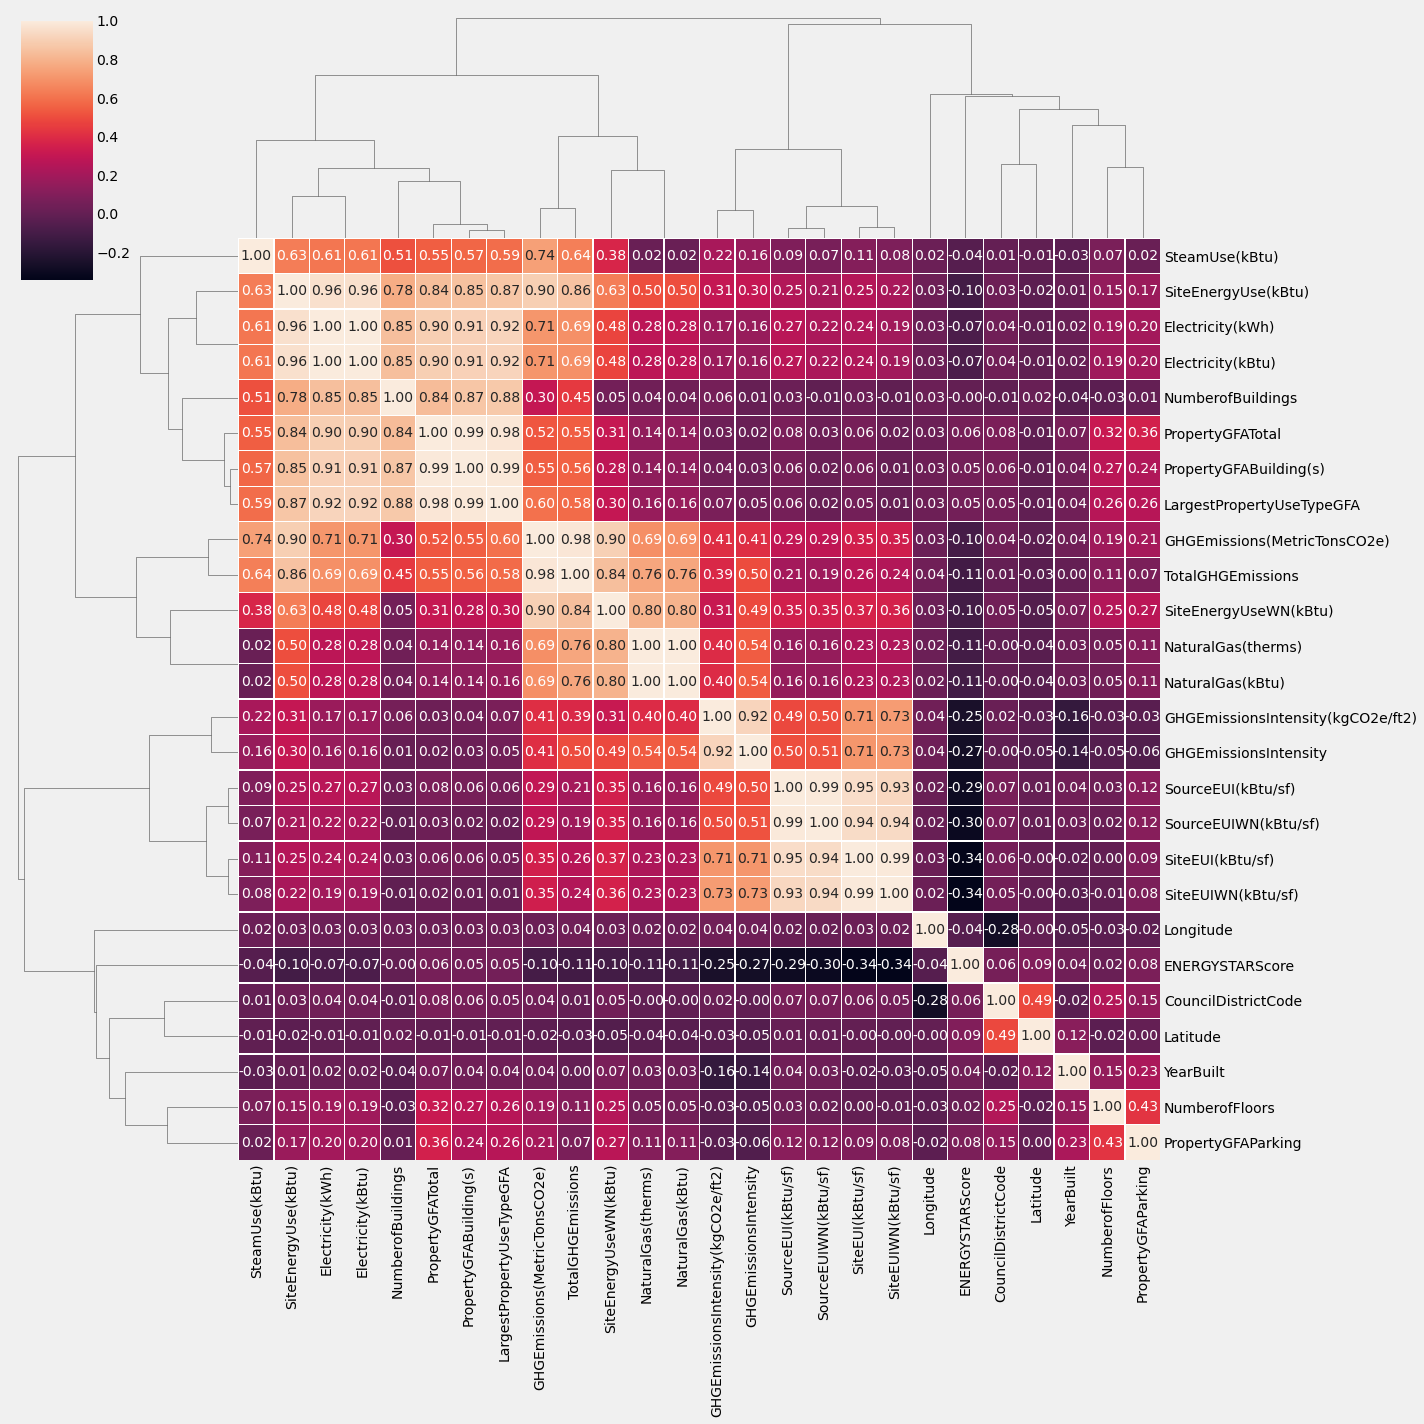

In [29]:
sns.clustermap(df_concat_complete.corr(), annot=True, linewidths=0.3, fmt='.2f', figsize=(20, 20))

# Deleting high correlated variables ( same variables with different units)

In [32]:
df_concat_complete.drop(['SourceEUIWN(kBtu/sf)',
                'SiteEUIWN(kBtu/sf)',
                'Electricity(kWh)',
                'NaturalGas(therms)',
                ], axis=1, inplace=True)

In [33]:
#Taking of empting values 
df_concat_complete.dropna(axis=0, inplace=True, how='all')

#Taking of duplicates values
df_concat_complete.drop_duplicates(inplace=True)


## DRAFT
# Retrait des colonnes de variance nulle
#to_del = [i for i,v in enumerate(df_concat_complete.nunique()) if v == 1]
# Drop useless columns
#df_concat_complete.drop(to_del, axis=1, inplace=True)

In [34]:
df_concat_complete.info()
                        

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3524 entries, 1 to 50226
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CouncilDistrictCode                3524 non-null   float64
 1   YearBuilt                          3524 non-null   int64  
 2   NumberofBuildings                  3522 non-null   float64
 3   NumberofFloors                     3524 non-null   float64
 4   PropertyGFATotal                   3524 non-null   float64
 5   PropertyGFAParking                 3524 non-null   float64
 6   PropertyGFABuilding(s)             3524 non-null   float64
 7   LargestPropertyUseTypeGFA          3491 non-null   float64
 8   ENERGYSTARScore                    2720 non-null   float64
 9   SiteEUI(kBtu/sf)                   3520 non-null   float64
 10  SourceEUI(kBtu/sf)                 3518 non-null   float64
 11  SiteEnergyUse(kBtu)                3520 non-null   floa

### Converting variables 'YearBuilt' & 'CouncilDistrictCode' to Categorical variables 'Object'

In [35]:
df_concat_complete['CouncilDistrictCode'] = df_concat_complete['CouncilDistrictCode'].astype(object)
df_concat_complete['YearBuilt'] = df_concat_complete['YearBuilt'].astype(object)

### Categorical variables of df_concat_complete

In [36]:
var_cat = list(df_concat_complete.select_dtypes(include='object').columns)
var_cat

['CouncilDistrictCode',
 'YearBuilt',
 'BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'Zip']

### Numerical variables of df_concat_complete

In [37]:
var_num = list(df_concat_complete.select_dtypes(include='float64').columns)
var_num

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Latitude',
 'Longitude',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

In [38]:
df_concat_complete.max()

CouncilDistrictCode                  7.000000e+00
YearBuilt                            2.015000e+03
NumberofBuildings                    1.110000e+02
NumberofFloors                       9.900000e+01
PropertyGFATotal                     9.320156e+06
PropertyGFAParking                   5.126080e+05
PropertyGFABuilding(s)               9.320156e+06
LargestPropertyUseTypeGFA            9.320156e+06
ENERGYSTARScore                      1.000000e+02
SiteEUI(kBtu/sf)                     8.344000e+02
SourceEUI(kBtu/sf)                   2.620000e+03
SiteEnergyUse(kBtu)                  8.739237e+08
SiteEnergyUseWN(kBtu)                4.716139e+08
SteamUse(kBtu)                       1.314066e+08
Electricity(kBtu)                    6.570744e+08
NaturalGas(kBtu)                     2.979090e+08
GHGEmissions(MetricTonsCO2e)         1.182489e+04
GHGEmissionsIntensity(kgCO2e/ft2)    3.138000e+01
Latitude                             4.773384e+01
Longitude                           -1.222207e+02


### Dealing with Nan in df_concat_complete

In [39]:
df_concat_complete.isnull().values.any()


True

In [40]:
df_concat_complete.isnull().sum().sum()


2309

In [41]:
targets = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

# Number of Nan per target variable
df_concat_complete[targets].isna().sum()

SiteEnergyUse(kBtu)     4
TotalGHGEmissions      67
dtype: int64

### Dealing with Nan for targets variables ('SiteEnergyUse(kBtu)','TotalGHGEmissions')

In [42]:
# Taking of Nan from targets variables
df_concat_complete = df_concat_complete.dropna(axis=0, subset=targets)

In [43]:
# Vérification
df_concat_complete[targets].isna().sum()

SiteEnergyUse(kBtu)    0
TotalGHGEmissions      0
dtype: int64

### Distribution of numerical variables

In [44]:
def distribution(data):
    plt.figure(figsize=(13, 50))
    for i, col in enumerate(data) :
        plt.subplot(9,2,i+1)
        sns.distplot(data[col], color='purple',bins = int(1 + np.log2(len(data)))) # Bins : Sturges' formula
        plt.xlabel(col)
        plt.ylabel('Densité')
        plt.style.use('bmh')
    plt.show()
    plt.tight_layout()



ValueError: num must be 1 <= num <= 18, not 19

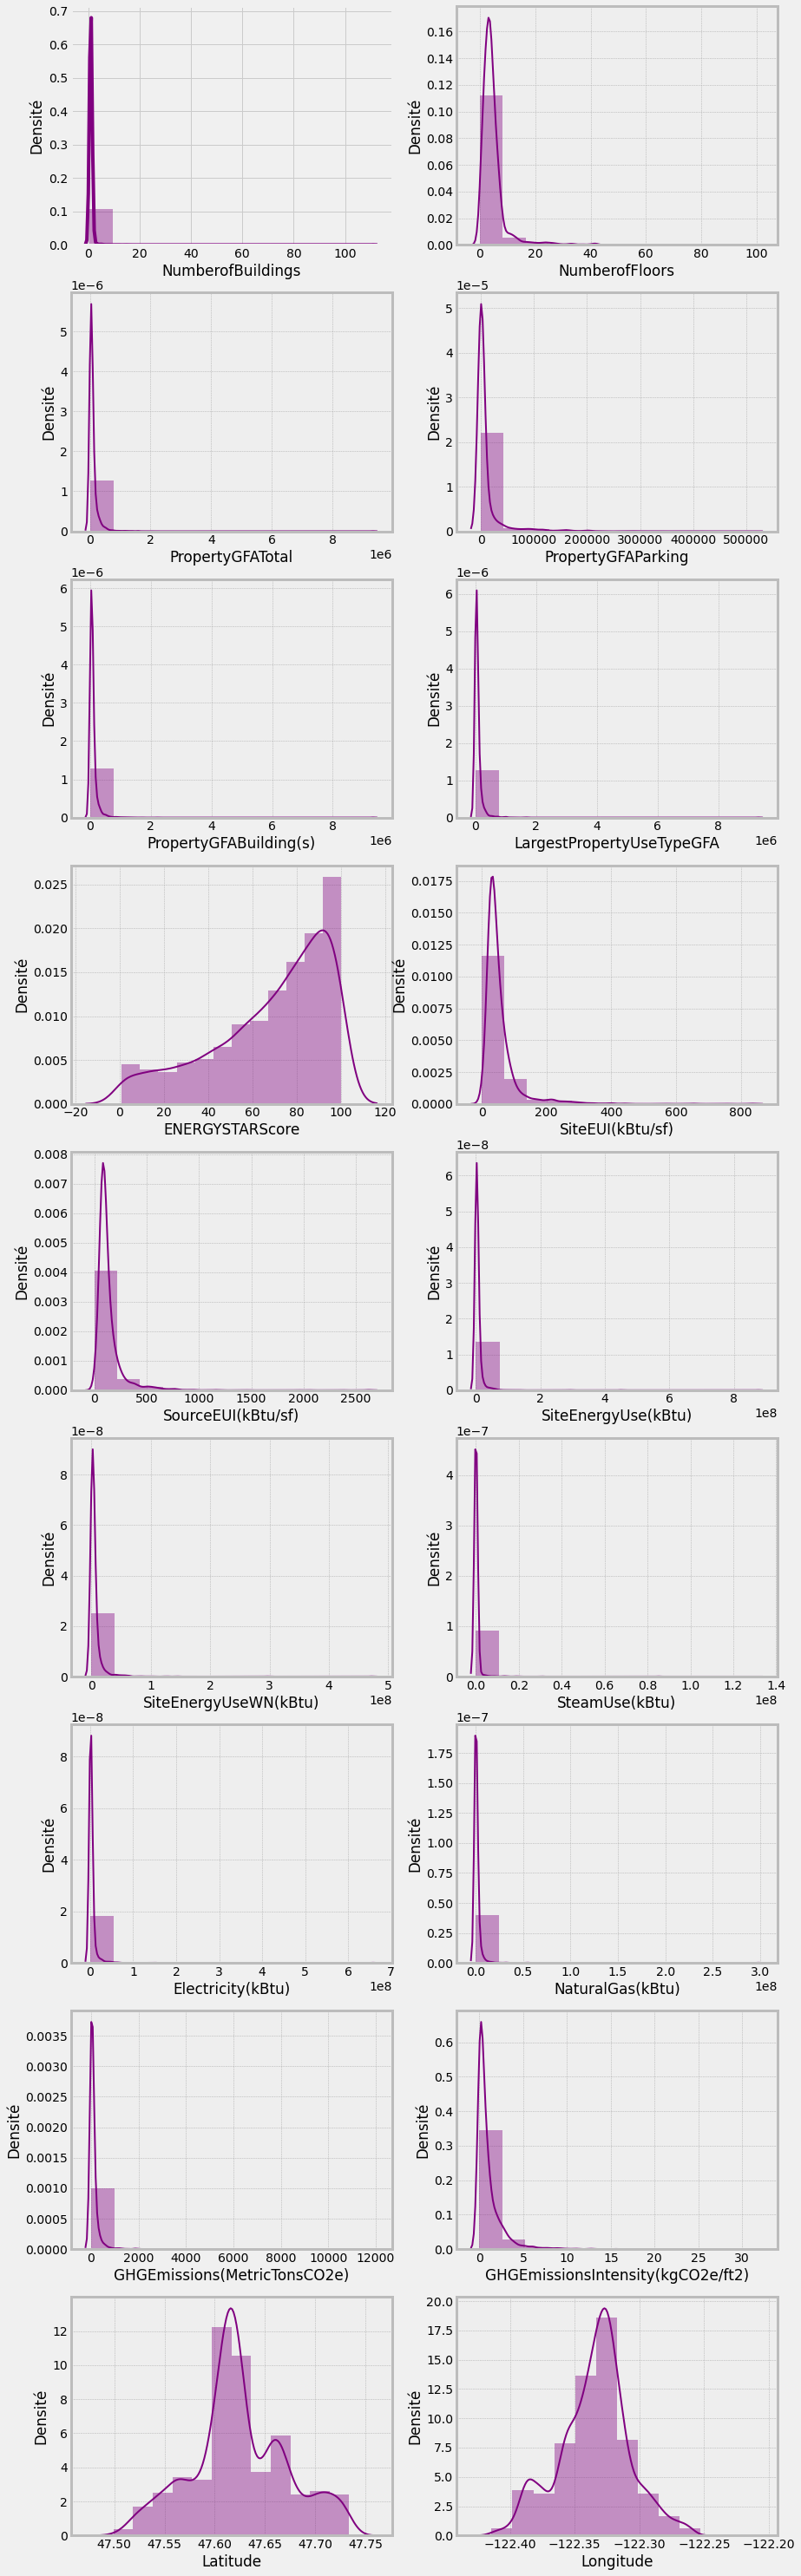

In [45]:
distribution(df_concat_complete[var_num])

In [ ]:
sns.distplot(df_concat_complete['TotalGHGEmissions'], color='purple',bins = int(1 + np.log2(len(df_concat)))) # Bins : Sturges' formula

plt.style.use('bmh')
plt.show()
plt.tight_layout()

## Dealing with  variable 'SiteEnergyUse' SiteEUI(kBtu/sf) 
Detecting whether outliers or non significant values

<AxesSubplot:xlabel='SiteEUI(kBtu/sf)', ylabel='Density'>

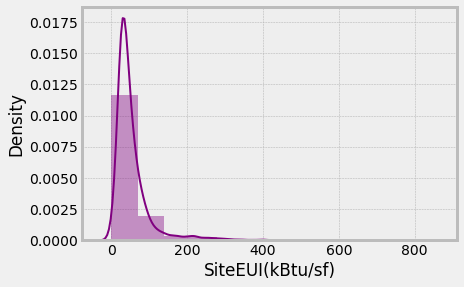

In [49]:
SiteEUI_df = df_concat_complete['SiteEUI(kBtu/sf)'].astype(int)
SiteEUI_df.describe()
sns.distplot(SiteEUI_df, color='purple',bins = int(1 + np.log2(len(SiteEUI_df)))) # Sturge Formula


Le graphique ci-dessous représente l'énergie totale utilisée 'on site' par unité de surface en kBtu/sf pour différents type de batiments aux USA en 2003 et 2012. La valeur maximale observé est d'environ 280 kBtu/sf (food service 2012).
Source : https://www.eia.gov/consumption/commercial/reports/2012/energyusage/#_ftn1

In [ ]:
# taking of variable SiteEUI(kbtu/sf) > 300
df_concat_complete = df_concat_complete[df_concat_complete['SiteEUI(kBtu/sf)'] < 300]

### Dealing with targets variables "TotalGHGEmissions", "SiteEnergyUse(kBtu)

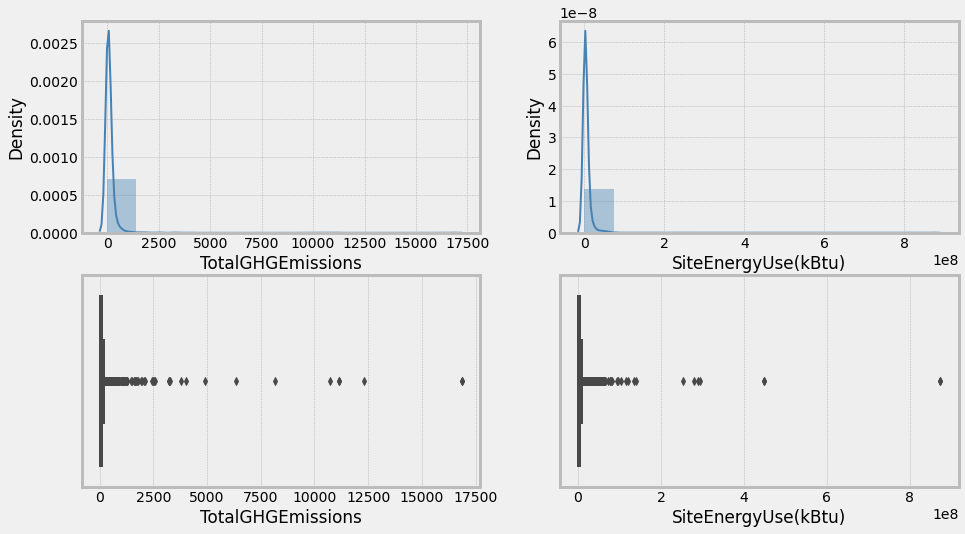

In [50]:
plt.style.use('bmh')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(df_concat_complete[label], bins=int(1 + np.log2(len(df_concat_complete))), color='steelblue')
    plt.subplot(2,2,i+3)
    sns.boxplot(df_concat_complete[label], orient="h")
plt.show()

  ==> Applying Log Transformation one these two targets variables for better visualization 

Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset. When modeling variables with non-linear relationships, the chances of producing errors may also be skewed negatively. In theory, we want to produce the smallest error possible when making a prediction, while also taking into account that we should not be overfitting the model.

Overfitting occurs when there are too many dependent variables in play that it does not have enough generalization of the dataset to make a valid prediction. Using the logarithm of one or more variables improves the fit of the model by transforming the distribution of the features to a more normally-shaped bell curve.

In [128]:
# Map data to a normal distribution (LOG TRANSFORMATION)


from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
pt.fit(df_concat_complete[targets])
df_targets_log = pd.DataFrame(pt.transform(df_concat_complete[targets]), columns = 'log' + df_concat_complete[targets].columns, index = df_concat_complete.index)

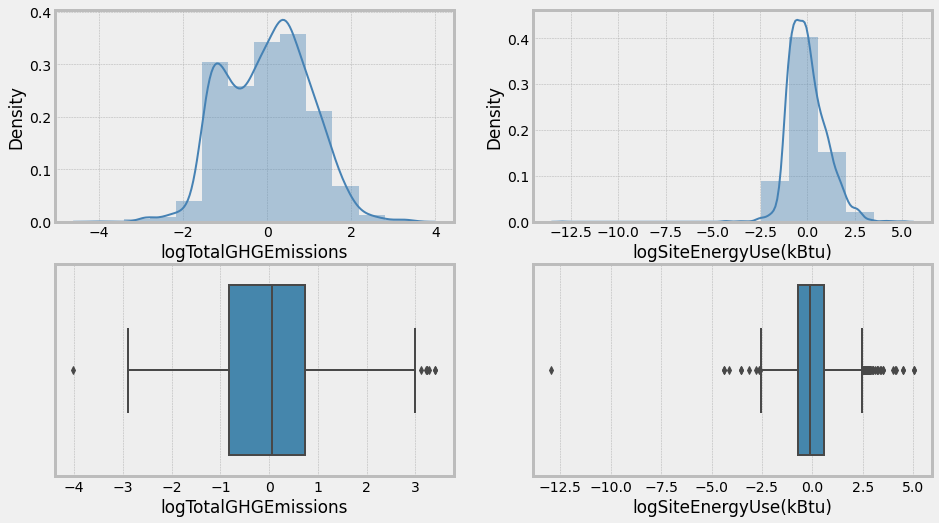

In [130]:

plt.style.use('bmh')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["logTotalGHGEmissions", "logSiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(df_targets_log[label], bins=int(1 + np.log2(len(df_targets_log))), color='steelblue')
    plt.subplot(2,2,i+3)
    sns.boxplot(df_targets_log[label], orient="h")
plt.show()

### Concatenation of dataframe df_concat_complete & df_targets_log

In [131]:
df_log = pd.concat([df_concat_complete, df_targets_log], axis=1)

### Taking of outliers for targets variables

In [52]:
# Calculating quartiles & IQR for SiteEnergyUse(kBtu)
Q1 = np.percentile(df_concat_complete["SiteEnergyUse(kBtu)"], 25)
Q3 = np.percentile(df_concat_complete["SiteEnergyUse(kBtu)"], 75)

born_sup_energy = Q3 + 1.5*(Q3-Q1)
born_inf_energy = Q1 - 1.5*(Q3-Q1)


In [53]:
# Calculating quartiles & IQR for TotalGHGEmissions

Q1 = np.percentile(df_concat_complete["TotalGHGEmissions"], 25)
Q3 = np.percentile(df_concat_complete["TotalGHGEmissions"], 75)

born_sup_co2 = Q3 + 1.5*(Q3-Q1) 
born_inf_co2 = Q1 - 1.5*(Q3-Q1)

In [54]:
# deleting outliers
df_log = df_concat_complete[(df_concat_complete["SiteEnergyUse(kBtu)"] < born_sup_energy)
            & (df_concat_complete["SiteEnergyUse(kBtu)"] > born_inf_energy)]

df_log = df_concat_complete[(df_concat_complete["TotalGHGEmissions"] < born_sup_co2)
            & (df_concat_complete["TotalGHGEmissions"] > born_inf_co2)]

### Visualization of df_log without outliers

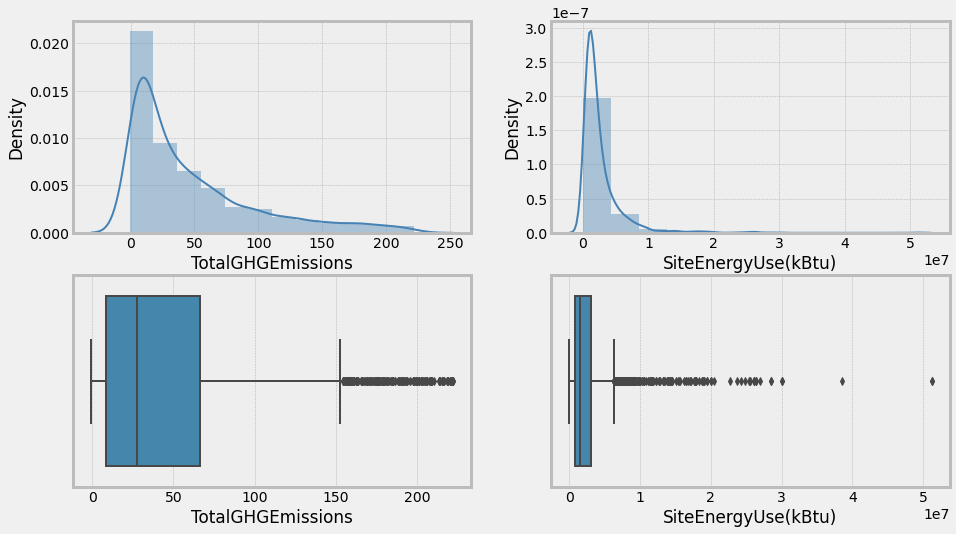

In [56]:
plt.style.use('bmh')

fig = plt.figure(1, figsize=(14, 8))
for i,label in enumerate(["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]) :
    plt.subplot(2,2,i+1)
    sns.distplot(df_log[label], bins=int(1 + np.log2(len(df_log))), color='steelblue')
    plt.subplot(2,2,i+3)
    sns.boxplot(df_log[label], orient="h")
plt.show()

In [151]:
df_concat_complete = df_log.drop(columns=['logTotalGHGEmissions', 'logSiteEnergyUse(kBtu)'], axis=1)

# Deleting these two variables as they are high correlated
df_concat_complete.drop(['SiteEnergyUseWN(kBtu)','PropertyGFABuilding(s)'], axis=1, inplace=True)

## Selecting Non residential buildings : Taking of rows containing 'family' word among categorical variables

In [160]:
# Retrait des lignes contenant le mot "family" dans les variables catégorielles
df_concat_complete_sorted = df_concat_complete[(df_concat_complete['BuildingType'].str.contains("family") == False)
                   & (df_concat_complete['PrimaryPropertyType'].str.contains("family") == False)
                   & (df_concat_complete['ListOfAllPropertyUseTypes'].str.contains("family") == False)
                   & (df_concat_complete['LargestPropertyUseType'].str.contains("family") == False)
                   ]

In [161]:
df_concat_complete.shape

(3334, 26)

In [162]:
df_concat_complete_sorted.shape

(1466, 26)

## Plotting ENERGY ('SiteEnergyUse(kBtu)') per BUILDING SPECIFICITIES ('BuildingType', 'Neighborhood', 'PrimaryPropertyType')

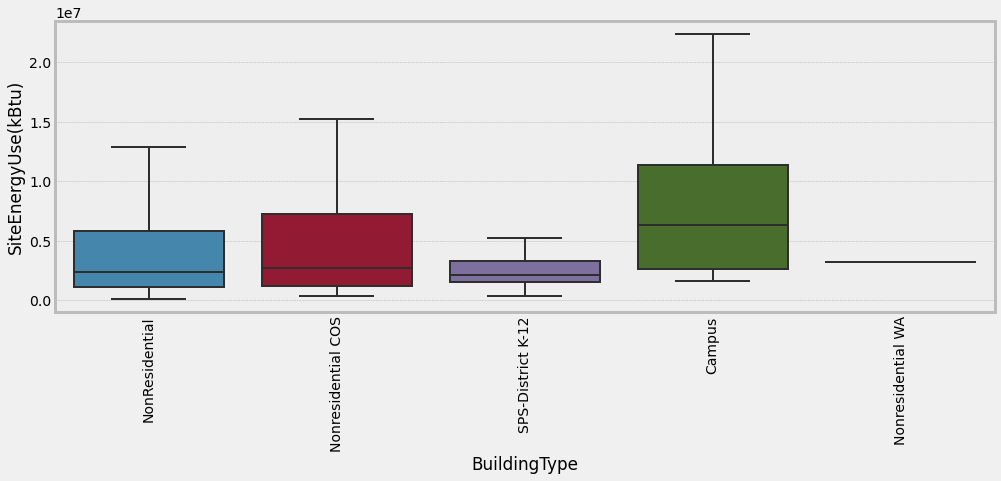

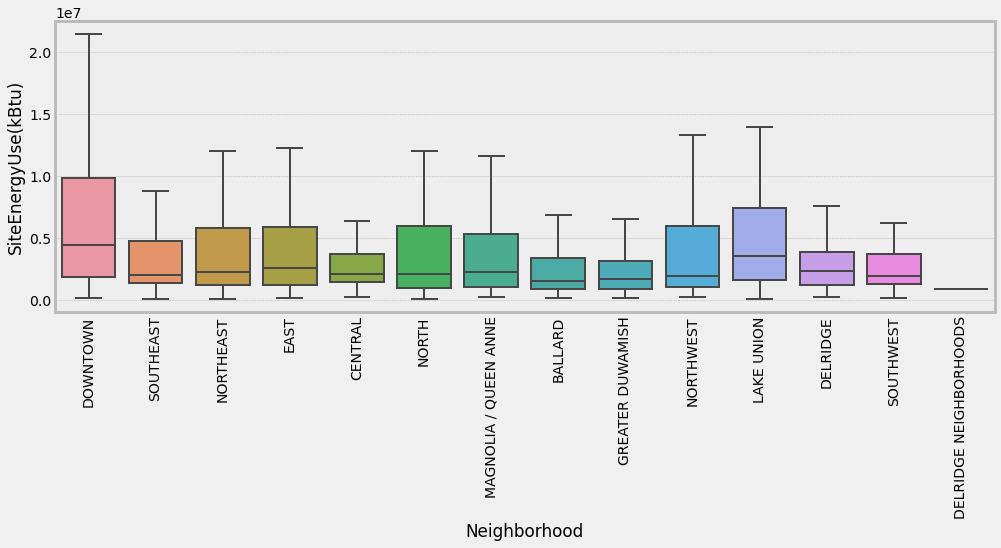

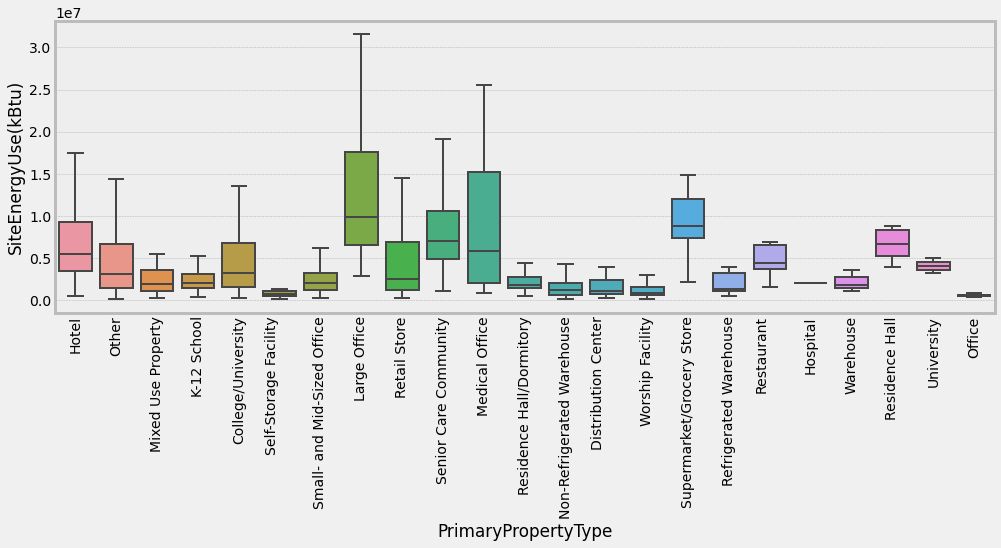

In [171]:
liste = ['BuildingType', 'Neighborhood', 'PrimaryPropertyType']

for el in liste:
    plt.figure(1, figsize=(15,5))
    sns.boxplot(data=df_concat_complete_sorted, x=el , y="SiteEnergyUse(kBtu)", showfliers=False)
    plt.xticks(rotation=90)
    plt.show()

### Plotting CO2 Emission "TotalGHGEmissions" per geographic area

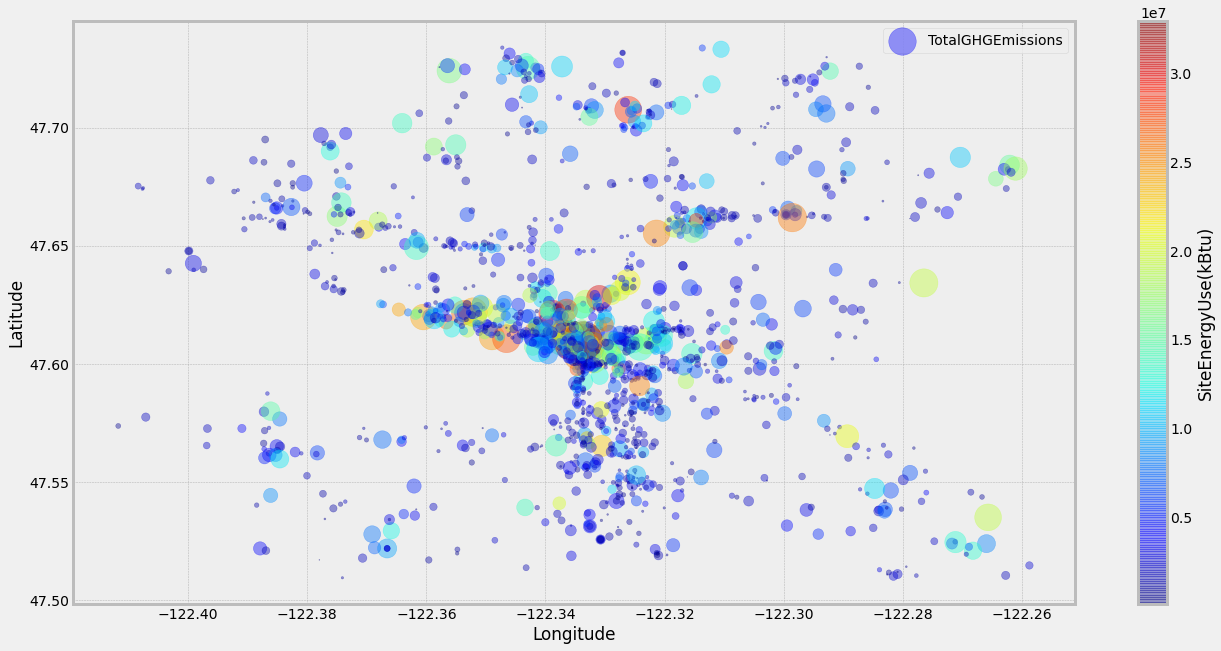

In [178]:
df_concat_complete_sorted.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,s=df_concat_complete_sorted["TotalGHGEmissions"], label="TotalGHGEmissions",c="SiteEnergyUse(kBtu)", cmap=plt.get_cmap("jet"),colorbar=True,figsize=(20, 10))
plt.show()

In [179]:
### EXPORTING FINAL DATASET
df_concat_complete_sorted.to_csv('dataset_clean_project_4.csv')